# Raw VS smoothed in situ drifters focalised one on drifter type
- hvplot figure
- trajectory figure

In [1]:
import os
from glob import glob

import numpy as np
import pandas as pd
import xarray as xr

%matplotlib inline
import matplotlib.pyplot as plt
import hvplot.xarray  # noqa
import holoviews as hv
#
import pynsitu as pyn
from pynsitu.maps import crs
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.geodesic import Geodesic

from lib import raw_dir, root_dir, smoothed_dir, images_dir, KEYS, list_type, open_L1_dataset, open_L2_dataset

import datetime
from scipy.stats import norm

/Users/mdemol/opt/anaconda3/envs/mdenv/lib/python3.9/site-packages/pyTMD/tools.py:55: UserWarning: ipyleaflet not available
  warnings.warn("ipyleaflet not available")
/Users/mdemol/opt/anaconda3/envs/mdenv/lib/python3.9/site-packages/pyTMD/tools.py:56: UserWarning: Some functions will throw an exception if called
  warnings.warn("Some functions will throw an exception if called")


In [2]:
def plot_histogram(darray, ax, bins=np.linspace(-1, 1, 30), **kwargs):
    h, b = np.histogram(darray, bins=bins, density=True)
    ax.plot(bins[:-1] + np.diff(bins) / 2, h, **kwargs)

In [3]:
list_type

['carthe_cnr_5min',
 'carthe_lops_5min',
 'carthe_uwa_5min',
 'code_ogs_10min',
 'melodi_eodyn_10min',
 'spotter_lops_30min',
 'svp_bcg_10min',
 'svp_ogs_10min',
 'svp_ogs_1h',
 'svp_scripps_10min',
 'svp_scripps_1h',
 'svp_shom_10min']

# LOAD

In [4]:
ds1 = open_L1_dataset(raw_dir,'carthe_lops_5min')
ds2v = open_L2_dataset(smoothed_dir,'carthe_lops_5min', 'variational', '30min')
ds2s = open_L2_dataset(smoothed_dir,'carthe_lops_5min', 'lowess', '30min')

/Users/mdemol/DATA_DRIFTERS/drifters/raw/L1_carthe_lops_20230912_192142_5min.nc
/Users/mdemol/DATA_DRIFTERS/drifters/smoothed/L2_carthe_lops_5min_variational_30min_v0.nc
/Users/mdemol/DATA_DRIFTERS/drifters/smoothed/L2_carthe_lops_5min_lowess_30min_v0.nc


____________
# One trajectory

In [5]:
i=4
ds2v_ = ds2v.isel(id=i).dropna('time')
ds2s_ = ds2s.isel(id=i).dropna('time')
ds1_ = ds1.isel(id=i).dropna('time')

In [6]:
st=711
ds2v__ = ds2v_.isel(time=slice(st, st+100))
ds2s__ = ds2s_.isel(time=slice(st, st+100))
tmin, tmax = ds2v__.time.min(), ds2v__.time.max()
test1, test2 = ds1_.time>=tmin, ds1_.time<=tmax
test = test1 & test2
ds1__ = ds1_.where(test, drop=True)


In [ ]:
d

In [121]:
layout = (ds1_.u.hvplot(kind='scatter', color ='k', s=6)*ds2v_.u.hvplot(kind='scatter',color = 'salmon', s=10)*ds2s_.u.hvplot(kind='scatter',color='teal', s=10)
          +ds1_.v.hvplot(kind='scatter', color ='k', s=6)*ds2v_.v.hvplot(kind='scatter',color = 'salmon', s=10)*ds2s_.v.hvplot(kind='scatter',color='teal', s=10)
          +ds1_.ax.hvplot(kind='scatter', color ='k', s=6)*ds2v_.ax.hvplot(kind='scatter',color = 'salmon', s=10)*ds2s_.ax.hvplot(kind='scatter',color='teal', s=10)
          +ds1_.ay.hvplot(kind='scatter', color ='k', s=6)*ds2v_.ay.hvplot(kind='scatter',color = 'salmon', s=10)*ds2s_.ay.hvplot(kind='scatter',color='teal', s=10)
         ).cols(2)
layout

:Layout
   .Overlay.I   :Overlay
      .Scatter.I   :Scatter   [time]   (u)
      .Scatter.II  :Scatter   [time]   (u)
      .Scatter.III :Scatter   [time]   (u)
   .Overlay.II  :Overlay
      .Scatter.I   :Scatter   [time]   (v)
      .Scatter.II  :Scatter   [time]   (v)
      .Scatter.III :Scatter   [time]   (v)
   .Overlay.III :Overlay
      .Scatter.I   :Scatter   [time]   (ax)
      .Scatter.II  :Scatter   [time]   (ax)
      .Scatter.III :Scatter   [time]   (ax)
   .Overlay.IV  :Overlay
      .Scatter.I   :Scatter   [time]   (ay)
      .Scatter.II  :Scatter   [time]   (ay)
      .Scatter.III :Scatter   [time]   (ay)

## MAPS

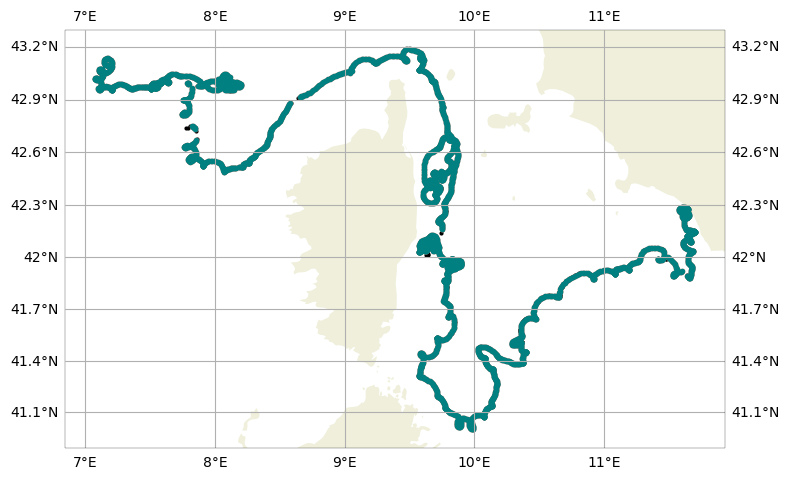

In [126]:
fig = plt.figure(tight_layout=True, figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Mercator())
gl = ax.gridlines(draw_labels=True,)
ax.add_feature(cfeature.LAND,)
ax.plot(ds1_.lon, ds1_.lat, ls='', marker ='.', transform=crs, color='k', markersize=4)
ax.plot(ds2v_.lon, ds2v_.lat, ls='', marker ='.', transform=crs, color='salmon', label='Variational')
ax.plot(ds2v_.lon, ds2v_.lat, ls='', marker ='.', transform=crs, color='teal', label='Lowess')

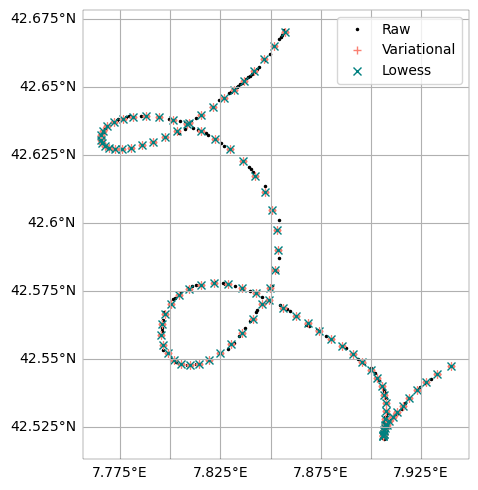

In [7]:
fig = plt.figure(tight_layout=True, figsize=(5, 5))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Mercator())
gl = ax.gridlines(draw_labels=True,)
gl.top_labels=False   # suppress top labels
gl.right_labels=False
ax.add_feature(cfeature.LAND,)
ax.plot(ds1__.lon, ds1__.lat, ls='', marker ='.', transform=crs, color='k', markersize=3, label='Raw')
ax.plot(ds2v__.lon, ds2v__.lat, ls='', marker ='+', transform=crs, color='salmon', label='Variational')
ax.plot(ds2v__.lon, ds2v__.lat, ls='', marker ='x', transform=crs, color='teal', label='Lowess')
ax.legend()
ax.set_ylabel('Latitude [°]')
ax.set_xlabel('Longitude [°]')

path = os.path.join(images_dir, 'istt_trajlonlat_uax.png')
fig.savefig(path, dpi=250)

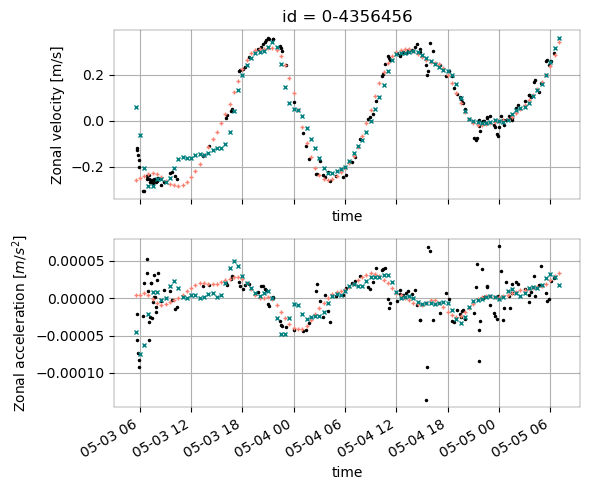

In [8]:
fig, axs = plt.subplots(2,1,tight_layout=True, sharex=True, figsize=(6, 5))
ax=axs[0]
ds1__.u.plot(ls='', marker ='.', color='k', markersize=3, label='Raw', ax=ax)
ds2v__.u.plot(ls='', marker ='+', color='salmon', markersize=3, label='Variational', ax=ax)
ds2s__.u.plot(ls='', marker ='x', color='teal', markersize=3, label='lowess', ax=ax)
#ax.legend()
ax.grid()
ax.set_ylabel('Zonal velocity [m/s]')

ax=axs[1]
ds1__.ax.plot(ls='', marker ='.', color='k', markersize=3, label='Raw', ax=ax)
ds2v__.ax.plot(ls='', marker ='+', color='salmon', markersize=3, label='Variational', ax=ax)
ds2s__.ax.plot(ls='', marker ='x', color='teal', markersize=3, label='lowess', ax=ax)
ax.set_title('')
ax.set_ylabel(r'Zonal acceleration $[m/s^2]$')
ax.grid()

fig.tight_layout()
path = os.path.join(images_dir, 'istt_timeseries_uax.png')
fig.savefig(path, dpi=250)

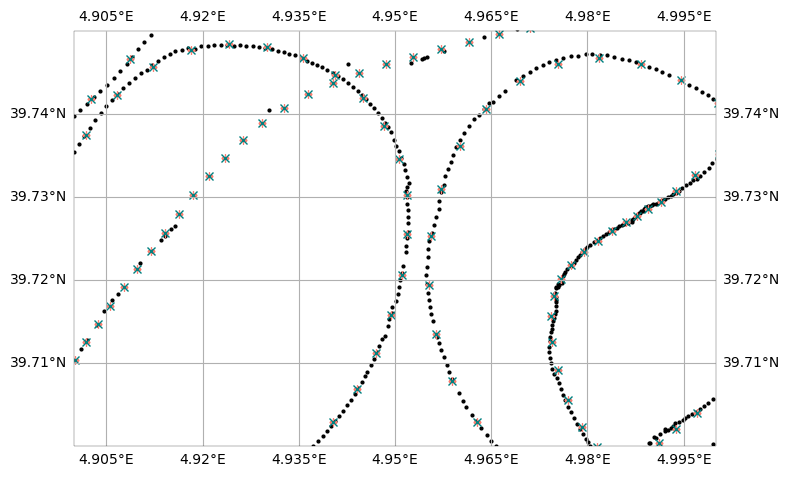

In [44]:
fig = plt.figure(tight_layout=True, figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Mercator())
gl = ax.gridlines(draw_labels=True,)
bbox = [4.9, 5., 39.7, 39.75]
ax.add_feature(cfeature.LAND,)
ax.plot(ds1_.lon, ds1_.lat, ls='', marker ='.', transform=crs, color='k', markersize=4)
ax.plot(ds2v_.lon, ds2v_.lat, ls='', marker ='+', transform=crs, color='salmon', label='Variational')
ax.plot(ds2v_.lon, ds2v_.lat, ls='', marker ='x', transform=crs, color='teal', label='Lowess')
ax.set_extent(bbox)

__________
# Distribution

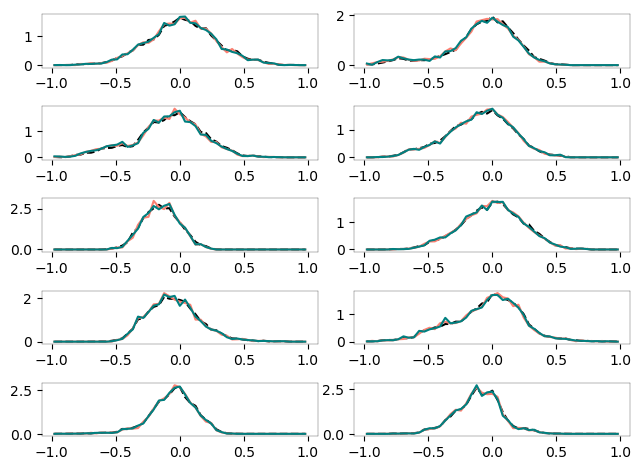

In [8]:
fig, axs = plt.subplots(5,2)
axs = axs.flatten()
for i in range(10):
    ax=axs[i]
    plot_histogram(ds1.isel(id=i).dropna('time').u, ax=ax,bins=np.linspace(-1, 1, 60), c='k', ls='--')
    plot_histogram(ds2v.isel(id=i).dropna('time').u, ax=ax,bins=np.linspace(-1, 1, 60), c='salmon')
    plot_histogram(ds2s.isel(id=i).dropna('time').u, ax=ax,bins=np.linspace(-1, 1, 60), c='teal')
fig.tight_layout()

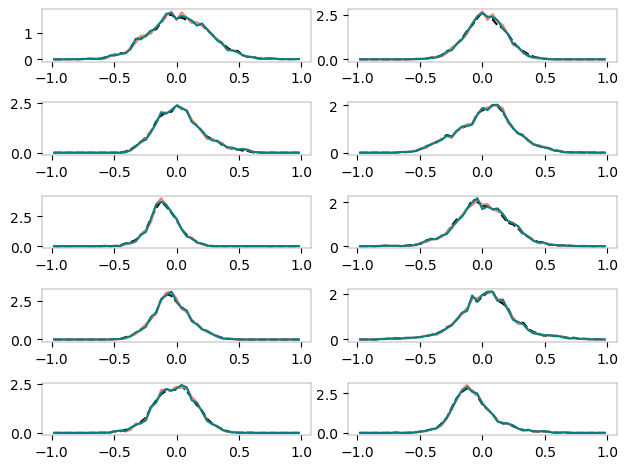

In [9]:
fig, axs = plt.subplots(5,2)
axs = axs.flatten()
for i in range(10):
    ax=axs[i]
    plot_histogram(ds1.isel(id=i).dropna('time').v, ax=ax,bins=np.linspace(-1, 1, 60), c='k', ls='--')
    plot_histogram(ds2v.isel(id=i).dropna('time').v, ax=ax,bins=np.linspace(-1, 1, 60), c='salmon')
    plot_histogram(ds2s.isel(id=i).dropna('time').v, ax=ax,bins=np.linspace(-1, 1, 60), c='teal')
fig.tight_layout()

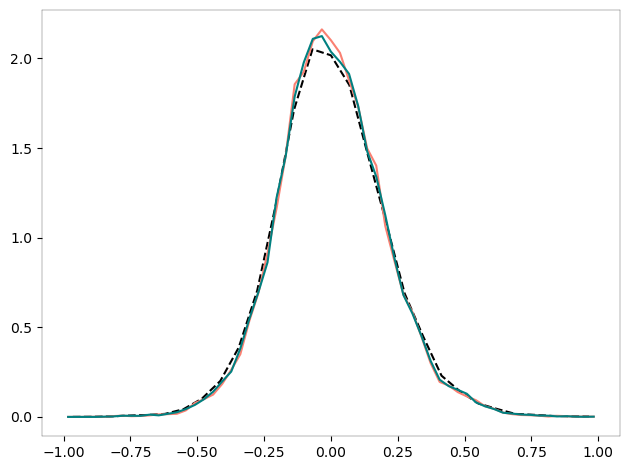

In [11]:
fig, ax = plt.subplots(1,1)
plot_histogram(ds1.v, ax=ax, c='k', ls='--')
plot_histogram(ds2v.v,bins=np.linspace(-1, 1, 60), ax=ax, c='salmon')
plot_histogram(ds2s.v,bins=np.linspace(-1, 1, 60), ax=ax, c='teal')
fig.tight_layout()

__________
# STD